# CSCSE5210 Project 2 Part A
### Name: Rubayet Kabir Tonmoy, ID: 11800754
### Name: Jayed Mohammad Barek, ID:11814532

-----------------------------Contributions------------------------------------
## Rubayet Kabir Tonmoy: R1, R2

## Jayed Mohammad Barek: R1, R3

We both worked on R1, brainstormed to fix the flow conservation issue in **`update_flow()`** function.<br>

# R1
Visualize your solution for the graph given in Figure 1, showing the capacities and the actual flow along each edge that is returned by executing your SA algorithm. This is an important test case for your code and will require you to hard code your **graph G**. Run your SA code for the graph in **`Figure 1 A`** and present its answer to the total flow into the sink node **E**. Verify that the value returned is approximately
the same value given in **`Figure 1 B`** (due to randomness in the operation of SA your solution may be different numerically but it should be close). <br>

In [ ]:
import networkx as nx

G = nx.DiGraph()   # unlike in Project 1, the edges in the network are directed.
G.add_edges_from([(0, 1, {'flow': 4}), (0, 1,{'capacity': 11}),
 (0, 2,{'flow': 3}), (0, 2,{'capacity': 8}),
  (0,3,{'flow': 5}), (0,3,{'capacity': 10}),
   (1,2, {'flow': 2}), (1,2,{'capacity': 8}),
    (1,4, {'flow': 2}), (1,4,{'capacity': 12}),
     (2,4, {'flow': 7}), (2,4,{'capacity': 9}),
      (2,5, {'flow': 1}), (2,5,{'capacity': 8}),
       (3,2, {'flow': 3}), (3,2,{'capacity': 9}),
        (3,5,{'flow': 2}), (3,5,{'capacity': 3}),
         (4,5, {'flow': 9}), (4,5,{'capacity': 9})])

In [ ]:
for path in nx.all_simple_edge_paths(G, source=0, target=5, cutoff=9):
  print(path)

[(0, 1), (1, 2), (2, 4), (4, 5)]
[(0, 1), (1, 2), (2, 5)]
[(0, 1), (1, 4), (4, 5)]
[(0, 2), (2, 4), (4, 5)]
[(0, 2), (2, 5)]
[(0, 3), (3, 2), (2, 4), (4, 5)]
[(0, 3), (3, 2), (2, 5)]
[(0, 3), (3, 5)]


{(0, 1): 4, (0, 2): 3, (0, 3): 5, (1, 2): 2, (1, 4): 2, (2, 4): 7, (2, 5): 1, (3, 2): 3, (3, 5): 2, (4, 5): 9}


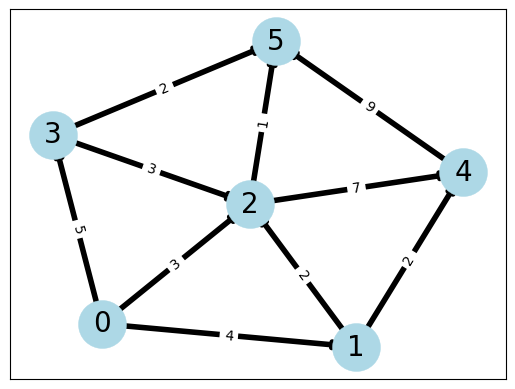

In [ ]:
import matplotlib.pyplot as plt

links = [(u, v) for (u, v, d) in G.edges(data=True)]
pos = nx.nx_pydot.graphviz_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=1200, node_color='lightblue', linewidths=0.25)
nx.draw_networkx_edges(G, pos, edgelist=links, width=4)

# node labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
# edge weight labels
edge_labels = nx.get_edge_attributes(G, 'flow')
print(edge_labels)
nx.draw_networkx_edge_labels(G, pos, edge_labels)

plt.show()

In [ ]:
from networkx.algorithms.flow import edmonds_karp
R = edmonds_karp(G, 0, 5)
flow_value = nx.maximum_flow_value(R, 0, 5) # The Edmonds Karp algorithm computes out the optimal flow for any given graph. Note that node 4 represents the sink node T.
print(flow_value)

20


In [ ]:
# Calculate the sum of flow values along a given path.
def sum_flow_along_path(graph, path):
    total_flow = 0
    for u, v in path:
      total_flow += graph[u][v]['flow']
    return total_flow

In [ ]:
# Check if current and next paths have any common edges, excluding edges to the source and sink.
def has_common_edges(path1, path2):
    # Remove the first and last edge from both paths
    if path1 == None or path2 == None:
        return False

    if len(path1) > 2:
        path1_inner_edges = path1[1:-1]
    else:
        path1_inner_edges = []

    if len(path2) > 2:
        path2_inner_edges = path2[1:-1]
    else:
        path2_inner_edges = []

    # Check for any common edges
    for edge in path1_inner_edges:
        if edge in path2_inner_edges:
            return True

    return False

In [ ]:
def update_flow(graph, path):
  # Find the minimum capacity along the path
  min_capacity = min(graph[u][v]['capacity'] - graph[u][v]['flow'] for u, v in path)
  # Update flow along the path
  if min_capacity > 0:
    for u, v in path:
      graph[u][v]['flow'] += max(0, random.randint(1, min_capacity))
      if graph[u][v]['flow'] > graph[u][v]['capacity']:
        graph[u][v]['flow'] = graph[u][v]['capacity']
  else:
    for u, v in path:
      graph[u][v]['flow'] += 0

In [ ]:
# Successor function to find all valid paths
def successor(graph, source, sink):
    paths = []
    visited = set()

    def find_paths(current_node, current_path):
        if current_node == source:
            paths.append(current_path[::-1])
            return
        visited.add(current_node)
        for neighbor in graph.predecessors(current_node):
            if neighbor not in visited and graph[neighbor][current_node]['flow'] < graph[neighbor][current_node]['capacity']:
                find_paths(neighbor, current_path + [(neighbor, current_node)])
        visited.remove(current_node)

    find_paths(sink, [])
    return paths

In [ ]:
valid_paths = successor(G, 0, 5)

print(valid_paths)

[]


In [ ]:
# "def update_flow(graph, path, iteration):
#   # Find the minimum capacity along the path
#   min_capacity = min(graph[u][v]['capacity'] - graph[u][v]['flow'] for u, v in path)
#   # Update flow along the path
#   if min_capacity > 0:
#     for u, v in path:
#       if iteration > 1:
#         incoming_flow = sum(graph[x][v]['flow'] for x in graph.predecessors(v))
#         outgoing_flow = sum(graph[v][y]['flow'] for y in graph.successors(v))
#         if outgoing_flow + min_capacity <= incoming_flow:
#           graph[u][v]['flow'] += max(0, random.randint(1, min_capacity))
#           if graph[u][v]['flow'] > graph[u][v]['capacity']:
#             graph[u][v]['flow'] = graph[u][v]['capacity']
#         else:
#           pass
#       else:
#         graph[u][v]['flow'] += max(0, random.randint(1, min_capacity))
#         if graph[u][v]['flow'] > graph[u][v]['capacity']:
#           graph[u][v]['flow'] = graph[u][v]['capacity']
#   else:
#     for u, v in path:
#       graph[u][v]['flow'] += 0

In [ ]:
import random
import math
import networkx as nx

def simulated_annealing_max_flow(graph, source, sink, Temparature):
  T = Temparature  # Our initial starting Temp
  alpha = 0.01  # our cooling rate
  current_path = None
  max_flow = 0

  # Initialize flow values
  for u, v in graph.edges():
    graph[u][v]['flow'] = 0

  for iterations in range(100):
    # Break loop if temparature T is 0
    if T == 0:
      break

    if iterations > 0:
       all_paths = successor(graph, source, sink)
    else:
       all_paths = nx.all_simple_edge_paths(graph, source=source, target=sink, cutoff=9)
       all_paths = list(all_paths)

    if all_paths == []:
      break

    # Randomly select a path
    random_path = random.choice(all_paths)
    sum_flow = sum_flow_along_path(graph, random_path)

    # change of flow (delta flow along the path)
    if has_common_edges(current_path, random_path):
      delta_flow = sum_flow - max_flow
    else:
      delta_flow = sum_flow + max_flow

    if delta_flow < 0:   # We calculate probability only if flow is negative
      probability = math.exp(delta_flow / T)
      if random.random() < probability:
        update_flow(graph, random_path)
      else:
        continue
    else:
      update_flow(graph, random_path)

    # Check the total flow into the sink node after each iteration
    max_flow = sum(graph[u][sink]['flow'] for u in graph.predecessors(sink))
    current_path = random_path

    # Cool down temparature by cooling rate alpha
    T = T * (1 - alpha)

  return max_flow, graph

In [ ]:
# Plot the final graph
def plot_graph(graph):
  pos = nx.nx_pydot.graphviz_layout(graph)
  plt.figure(figsize=(10, 6))
  nx.draw_networkx(graph, pos, node_size=1200, node_color='lightblue', font_size=10, font_family="sans-serif")
  edge_labels = {(u, v): f"{graph[u][v]['flow']}/{graph[u][v]['capacity']}" for u, v in graph.edges()}
  nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)
  plt.show()

Maximum flow: 17


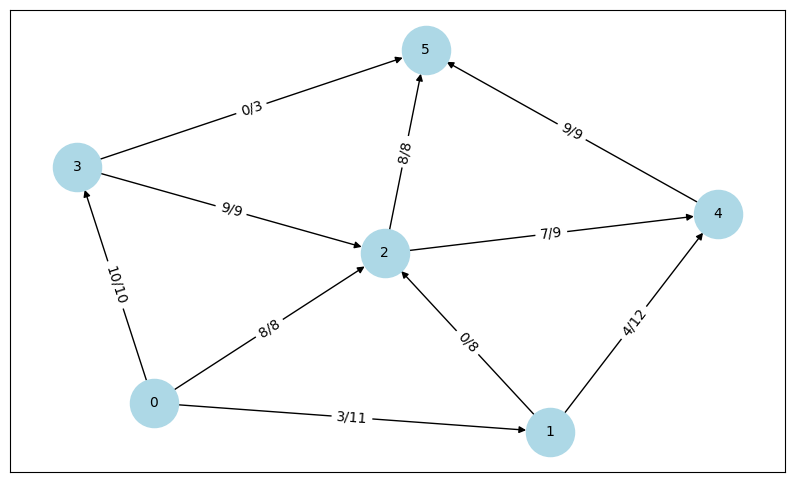

In [ ]:
# Run simulated annealing
max_flow, final_graph = simulated_annealing_max_flow(G, 0, 5, Temparature=100)
print("Maximum flow:", max_flow)

# Plot final graph with flow values
plot_graph(final_graph)

# R2

Running my SA code developed in Python on a graph GR2 containing **30 nodes** and an average connectivity of **3 (connectivity parameter of 0.1)**. In my graph GR2, I randomly generated capacity **(C)** values across edges in the range **1** to **10**. Work out the total flow value tf into node **T** and compared it with the total flow value **`tf_net`** returned by the Edmonds Karp algorithm supported by Networkx. The Edmonds Karp method is an optimal algorithm that guarantees the optimal flow value for any given graph. Present both values, **`tf`** and **`tf_net`**.<br>

In [ ]:
import networkx as nx
import random

# Number of nodes
Node = 30

# Create a directed random binomial graph with average connectivity of Node * 0.1
GR2 = nx.gnp_random_graph(Node, 0.1, directed=True)

# Print nodes and edges of the generated graph
print("Nodes:", GR2.nodes())
print("Edges:", GR2.edges())

# Assign random capacities to the edges in the range 1, 10
for u, v in GR2.edges():
    GR2[u][v]['capacity'] = random.randint(1, 10)
    GR2[u][v]['flow'] = 0  # Initialize flow to 0

# Display the graph with capacities
print("Graph with capacities:")
for u, v in GR2.edges():
    print(f"Edge ({u}, {v}): Capacity = {GR2[u][v]['capacity']}")

Nodes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
Edges: [(0, 10), (0, 28), (0, 29), (1, 14), (2, 11), (2, 17), (3, 5), (3, 19), (4, 6), (4, 17), (5, 1), (5, 4), (5, 11), (7, 4), (7, 6), (7, 10), (7, 20), (7, 23), (8, 26), (9, 4), (9, 5), (9, 13), (9, 24), (10, 29), (11, 13), (11, 17), (11, 21), (11, 24), (12, 1), (12, 13), (12, 25), (13, 1), (13, 5), (13, 10), (13, 14), (13, 21), (14, 13), (14, 19), (14, 27), (14, 29), (15, 4), (16, 22), (17, 0), (17, 1), (17, 15), (18, 2), (18, 4), (18, 26), (18, 28), (19, 26), (19, 28), (20, 12), (21, 19), (22, 5), (23, 3), (23, 6), (23, 8), (23, 14), (23, 20), (23, 24), (24, 14), (24, 22), (25, 13), (25, 18), (25, 19), (25, 20), (26, 20), (27, 1), (27, 9), (27, 14), (27, 24), (28, 1), (28, 6), (28, 10), (28, 11), (28, 12), (28, 21), (28, 23), (28, 26), (29, 5), (29, 27)]
Graph with capacities:
Edge (0, 10): Capacity = 9
Edge (0, 28): Capacity = 6
Edge (0, 29): Capacity = 9
Edge (1,

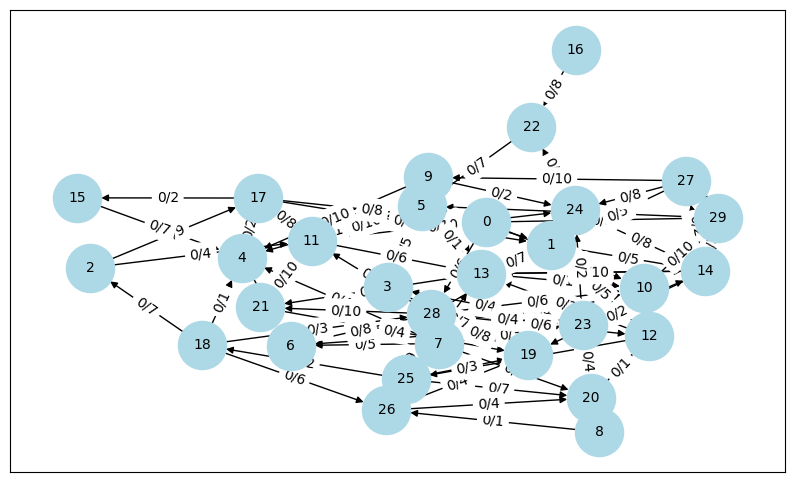

In [ ]:
plot_graph(GR2)

In [ ]:
# Run simulated annealing on GR2
total_flow, final_graph_state = simulated_annealing_max_flow(GR2, 0, 29, Temparature=100)
print("Total flow:", total_flow)

Total flow: 22


## Edmonds Karp On Graph GR2

The Edmonds Karp algorithm computes out the optimal flow for any given graph.

In [ ]:
from networkx.algorithms.flow import edmonds_karp
R = edmonds_karp(GR2, 0, 29)
flow_value = nx.maximum_flow_value(R, 0, 29)
print(flow_value)

22


# R3
a) Run your SA code with 30 different random graphs **G** (having 30 nodes and an average connectivity of 3). Work out the average value of the total flow into sink node T. Present the total flow **`tf_net_avg(100)`** with initial temperature set to **100**.<br>

In [ ]:
import networkx as nx
import random

avg_total_flow = 0
i = 1

while(i <= 30):
  # Number of nodes
  Node = 30

  # Create a directed random binomial graph with average connectivity of Node * 0.1 => 30 * 0.1 => 3
  GN = nx.gnp_random_graph(Node, 0.1, directed=True)
  # Assign random capacities to the edges in the range 1, 10
  for u, v in GN.edges():
    GN[u][v]['capacity'] = random.randint(1, 10)

  # Making sure that there is a path from source node to sink
  all_paths = nx.all_simple_edge_paths(GN, source=0, target=29, cutoff=9)
  all_paths = list(all_paths)
  if not all_paths:
    continue

  total_flow, _ = simulated_annealing_max_flow(GN, 0, 29, Temparature=100)
  print(f"Total flow for graph G{i}:", total_flow)
  avg_total_flow += total_flow
  i += 1

avg_total_flow /= 30
print("Average total flow:", avg_total_flow)

Total flow for graph G1: 9
Total flow for graph G2: 14
Total flow for graph G3: 3
Total flow for graph G4: 1
Total flow for graph G5: 10
Total flow for graph G6: 4
Total flow for graph G7: 8
Total flow for graph G8: 7
Total flow for graph G9: 12
Total flow for graph G10: 16
Total flow for graph G11: 12
Total flow for graph G12: 7
Total flow for graph G13: 4
Total flow for graph G14: 9
Total flow for graph G15: 6
Total flow for graph G16: 10
Total flow for graph G17: 9
Total flow for graph G18: 15
Total flow for graph G19: 8
Total flow for graph G20: 15
Total flow for graph G21: 3
Total flow for graph G22: 4
Total flow for graph G23: 5
Total flow for graph G24: 12
Total flow for graph G25: 14
Total flow for graph G26: 3
Total flow for graph G27: 6
Total flow for graph G28: 6
Total flow for graph G29: 10
Total flow for graph G30: 12
Average total flow: 8.466666666666667


b) Now re-running my SA code on 30 different random graphs, each of size 30 nodes once again and with the same connectivity, but this time with an initial temperature **T of 1000**. Compute and present the average flow **`tf_net_av(1000)`**.<br>

In [ ]:
import networkx as nx
import random

avg_total_flow = 0
i = 1

while(i <= 30):
  # Number of nodes
  Node = 30

  # Create a directed random binomial graph with average connectivity of Node * 0.1 => 30 * 0.1 => 3
  GN = nx.gnp_random_graph(Node, 0.1, directed=True)
  # Assign random capacities to the edges in the range 1, 10
  for u, v in GN.edges():
    GN[u][v]['capacity'] = random.randint(1, 10)

  # Making sure that there is a path from source node to sink
  all_paths = nx.all_simple_edge_paths(GN, source=0, target=29, cutoff=9)
  all_paths = list(all_paths)
  if not all_paths:
    continue

  total_flow, _ = simulated_annealing_max_flow(GN, 0, 29, Temparature=1000)
  print(f"Total flow for graph G{i}:", total_flow)
  avg_total_flow += total_flow
  i += 1

avg_total_flow /= 30
print("Average total flow:", avg_total_flow)

Total flow for graph G1: 12
Total flow for graph G2: 1
Total flow for graph G3: 5
Total flow for graph G4: 13
Total flow for graph G5: 18
Total flow for graph G6: 13
Total flow for graph G7: 9
Total flow for graph G8: 9
Total flow for graph G9: 4
Total flow for graph G10: 11
Total flow for graph G11: 17
Total flow for graph G12: 17
Total flow for graph G13: 11
Total flow for graph G14: 6
Total flow for graph G15: 5
Total flow for graph G16: 6
Total flow for graph G17: 6
Total flow for graph G18: 11
Total flow for graph G19: 14
Total flow for graph G20: 7
Total flow for graph G21: 4
Total flow for graph G22: 11
Total flow for graph G23: 4
Total flow for graph G24: 8
Total flow for graph G25: 4
Total flow for graph G26: 17
Total flow for graph G27: 9
Total flow for graph G28: 1
Total flow for graph G29: 2
Total flow for graph G30: 11
Average total flow: 8.866666666666667


c) Do you notice a significant difference between **`tf_net_avg(100)`** and **`tf_net_avg(1000)`**? If so, why do you think this occurs? On the other hand if no significant difference occurs, why do you think this is the case?<br>

**Answer:** Yes we did notice a difference between the two functions, but the differnce wasn't very significant. When we ran the simulation with an initial temperature of **1000**, we found that the average flow was a bit higher than when we used an initial temperature of **100**. This is because the higher temperature let the algorithm explore more possibilities at the beginning, which helped it find better solutions. But the difference wasn't huge, as both temperatures eventually cooled down and the algorithm ended up finding good solutions either way.